# Ch. 17 LLMs and the Practice of Data Science

* This notebook has the rankings I used to measure exposure (of data science tasks and of skills developed in chapter of the book)

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.colors as colors
import cycler

# set plotting parameters from the beginning
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 14}
axes = {'titlesize' : 22,
        'labelsize' : 20,
       'prop_cycle' : cycler.cycler(color='k')}
lines = {'color' : 'k'}
figure = {'figsize' : (10,4),
         'autolayout' : True,}
matplotlib.rc('font', **font)
matplotlib.rc('axes', **axes)
matplotlib.rc('figure', **figure)
matplotlib.rc('lines', **lines)


In [88]:
# Make a plot of skills from the OpenAI paper
cols = ['Basic Skill','alpha','beta','gamma' ]
data = [['Active Listening',0.128,0.214,0.449 ],
['Mathematics',-0.127,0.161,0.787 ],
['Reading Comprehension',0.153,0.470,-0.346 ],
['Science',-0.114,-0.230,-0.346 ],
['Speaking',-0.028,0.133,0.294 ],
['Writing',0.368,0.467,0.566 ],
['Active Learning',-0.157,-0.065, 0.028 ],
['Critical Thinking',- 0.264 , - 0.196 , - 0.129 ],
['Learning Strategies',- 0.072 , - 0.209 , - 0.346 ],
['Monitoring',-0.067 ,-0.149 ,-0.232 ],
['Programming',0.637 ,0.623 ,0.609]]

df = pd.DataFrame(data,columns=cols)
df.set_index(df['Basic Skill'], inplace=True)
df.drop(columns=['Basic Skill'], inplace=True)

df_sorted = df.mean(axis=1).sort_values()

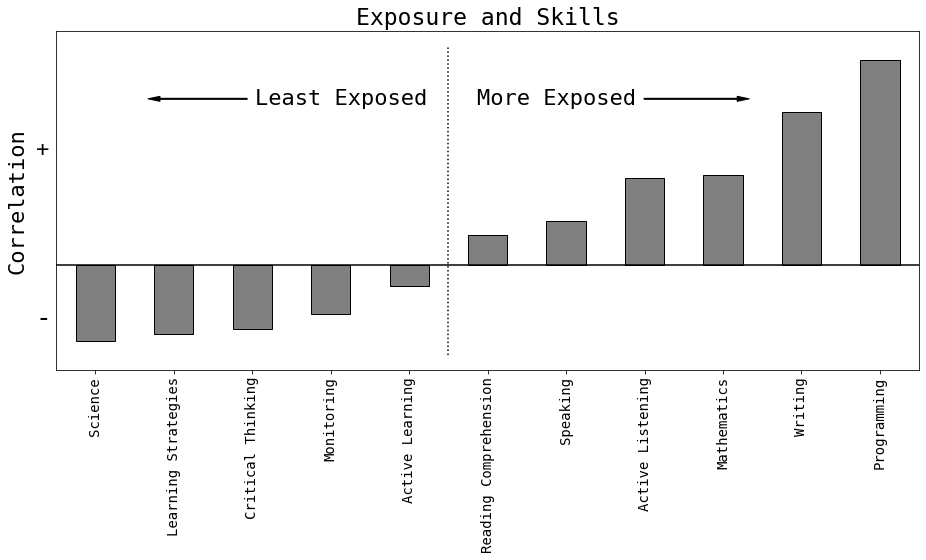

In [89]:
# Make a plot of skills from the OpenAI paper
# sort by average effect
df
fig, ax = plt.subplots(figsize=(13,8))
#df.loc[df_sorted.index].plot(kind='bar', ax = ax, color=['0.1','0.5','0.9'], edgecolor='k')
df_sorted.plot(kind='bar', ax = ax, facecolor='0.5', edgecolor='k')
#greek_labs = [r'$\alpha$',r'$\beta$',r'$\gamma$']
#string_labs = ['E1', 'E1 + 0.5E2', 'E1 + E2']
#ax.legend(string_labs, bbox_to_anchor=(1.0, 1.00))
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax],[0,0])
ax.set_title('Exposure and Skills', fontsize=23)
ytk = ax.set_yticks([])
xcoord = -0.015
ax.text(xcoord*3, 0.5, 'Correlation', fontsize=22, transform = ax.transAxes, ha='center', va = 'center', 
       rotation=90)
ax.text(xcoord,0.65, '+', fontsize=22, transform = ax.transAxes, ha='center', va = 'center')
ax.text(xcoord,0.15, '-', fontsize=26, transform = ax.transAxes, ha='center', va = 'center')
ax.set_xlabel('')
ax.annotate('Least Exposed', xytext=(0.33, 0.8), xy=(0.1, 0.8), fontsize=22,
            xycoords='axes fraction',textcoords='axes fraction', ha='center',va='center',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
ax.annotate('More Exposed', xytext=(0.58, 0.8), xy=(0.81, 0.8), fontsize=22, 
            xycoords='axes fraction',textcoords='axes fraction', ha='center',va='center',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
ymin, ymax = ax.get_ylim()
ax.plot([4.5,4.5], [ymin, ymax], ls='dotted')

## Data Science Tasks

* Using the tasks from [O*Net Online](https://www.onetonline.org/link/details/15-2051.00)
* I will start by evaluating each task along four skills:
    * Business (B)
    * ML & Stats (ML)
    * Programming (P)
    * Soft skills (S)
* Evaluations are "low" (0), "medium" (1), "high" (3)
* I then compute an exposure metric using the formula in the book

In [91]:
# Define column names (Danke ChatGPT!)
columns = ["Tasks", "Business", "Machine Learning + Statistics", "Programming", "Soft"]

# Define data values
data = [
    ['Analyze, manipulate, or process large sets of data using statistical software.', 'High', 'Low', 'High', 'Low'],
    ['Apply feature selection algorithms to models predicting outcomes of interest, such as sales, attrition, and healthcare use.', 'High', 'High', 'Medium', 'Low'],
    ['Apply sampling techniques to determine groups to be surveyed or use complete enumeration methods.', 'Low', 'High', 'Medium', 'Low'],
    ['Clean and manipulate raw data using statistical software.', 'Medium', 'Low', 'High', 'Low'],
    ['Compare models using statistical performance metrics, such as loss functions or proportion of explained variance.', 'Low', 'High', 'Medium', 'Low'],
    ['Deliver oral or written presentations of the results of mathematical modeling and data analysis to management or other end users.', 'Medium', 'Low', 'Low', 'Medium'],
    ['Design surveys, opinion polls, or other instruments to collect data.', 'Medium', 'High', 'Low', 'Low'],
    ['Identify business problems or management objectives that can be addressed through data analysis.', 'High', 'Low', 'Low', 'Medium'],
    ['Identify relationships and trends or any factors that could affect the results of research.', 'Medium', 'High', 'Medium', 'Low'],
    ['Identify solutions to business problems, such as budgeting, staffing, and marketing decisions, using the results of data analysis.', 'High' ,'Medium' ,'Low' ,'Medium'],
    ['Propose solutions in engineering, the sciences, and other fields using mathematical theories and techniques.', 'High' ,'Medium' ,'Low' ,'Low'],
    ['Read scientific articles, conference papers, or other sources of research to identify emerging analytic trends and technologies.', 'Medium' ,'Medium' ,'Low' ,'Low'],
    ['Recommend data-driven solutions to key stakeholders.', 'High' ,'Medium' ,'Low' ,'High'],
    ['Test, validate, and reformulate models to ensure accurate prediction of outcomes of interest.',  'Medium', 'High', 'Medium', 'Low'],
    ['Write new functions or applications in programming languages to conduct analyses.', 'Low' ,'Medium' ,'High' ,'Low']
]

# Create DataFrame
df_tasks = pd.DataFrame(data=data, columns=columns)

# Print DataFrame
df_tasks


,Tasks,Business,Machine Learning + Statistics,Programming,Soft
0,"Analyze, manipulate, or process large sets of ...",High,Low,High,Low
1,Apply feature selection algorithms to models p...,High,High,Medium,Low
2,Apply sampling techniques to determine groups ...,Low,High,Medium,Low
3,Clean and manipulate raw data using statistica...,Medium,Low,High,Low
4,Compare models using statistical performance m...,Low,High,Medium,Low
5,Deliver oral or written presentations of the r...,Medium,Low,Low,Medium
6,"Design surveys, opinion polls, or other instru...",Medium,High,Low,Low
7,Identify business problems or management objec...,High,Low,Low,Medium
8,Identify relationships and trends or any facto...,Medium,High,Medium,Low
9,"Identify solutions to business problems, such ...",High,Medium,Low,Medium


In [92]:
# Numerical Scale
dict_change = {'High':3, 'Low':0, 'Medium':1}
df_tasks1 = df_tasks.copy()
for c, col in enumerate(df_tasks.columns):
    df_tasks1[col].replace(dict_change, inplace=True)
df_tasks1

,Tasks,Business,Machine Learning + Statistics,Programming,Soft
0,"Analyze, manipulate, or process large sets of ...",3,0,3,0
1,Apply feature selection algorithms to models p...,3,3,1,0
2,Apply sampling techniques to determine groups ...,0,3,1,0
3,Clean and manipulate raw data using statistica...,1,0,3,0
4,Compare models using statistical performance m...,0,3,1,0
5,Deliver oral or written presentations of the r...,1,0,0,1
6,"Design surveys, opinion polls, or other instru...",1,3,0,0
7,Identify business problems or management objec...,3,0,0,1
8,Identify relationships and trends or any facto...,1,3,1,0
9,"Identify solutions to business problems, such ...",3,1,0,1


### let's generate a score of how much this will be done by LLM

Idea:
* In principle, with a large and specialized enough corpus, business, ML and Programming can be learned by an LLM.  Positive score, but I will give less to business, because many things have to be learned "on the job"
* But there's an interaction between Business and ML and Programming: I'm calling this Analytical Skills, and I assume this won't be easily achieved by LLM.  
* Soft skills also have a negative effect

In [93]:
weights = {'B':0.2, 'ML':0.8, 'P':1, 'S':-0.2, 'BxML':-0.2, 'BxP':-0.2}
func_analytics = lambda x: (x['Business']*weights['B'] + 
                    x['Machine Learning + Statistics']*weights['ML'] + 
                    x['Programming']*weights['P'] + 
                    x['Soft']*weights['S'] + 
                    x['Business']*x['Machine Learning + Statistics']*weights['BxML'] + 
                    x['Business']*x['Programming']*weights['BxP'])
# if there's no interaction
func_nointer = lambda x: (x['Business']*weights['B'] + 
                    x['Machine Learning + Statistics']*weights['ML'] + 
                    x['Programming']*weights['P'])
# convert to three categories
# this function was created by ChatGPT!
def num_to_cat(df, col, thres1, thres2):
    # Use pd.cut() to bin the numerical column into three categories
    df[col + "_cat"] = pd.cut(df[col], bins=[-float("inf"), thres1, thres2, float("inf")], 
                              labels=["Low", "Medium", "High"])
    # Return the DataFrame with the new categorical column
    return df


In [94]:
df_tasks1['score_analytics'] = df_tasks1.apply(func_analytics, axis=1)
df_tasks1['score_nointer'] = df_tasks1.apply(func_nointer, axis=1)
df_tasks1.sort_values(by='score_analytics', inplace=True)
# create a categorical variable
thres1, thres2 = df_tasks1.score_analytics.quantile([0.3, 0.6])
print(thres1, thres2)
df_tasks2 = num_to_cat(df=df_tasks1, col='score_analytics', thres1 = thres1, thres2 =thres2)
df_tasks1

0.8 2.24


,Tasks,Business,Machine Learning + Statistics,Programming,Soft,score_analytics,score_nointer,score_analytics_cat
5,Deliver oral or written presentations of the r...,1,0,0,1,0.0,0.2,Low
12,Recommend data-driven solutions to key stakeho...,3,1,0,3,0.2,1.4,Low
7,Identify business problems or management objec...,3,0,0,1,0.4,0.6,Low
9,"Identify solutions to business problems, such ...",3,1,0,1,0.6,1.4,Low
10,"Propose solutions in engineering, the sciences...",3,1,0,0,0.8,1.4,Low
11,"Read scientific articles, conference papers, o...",1,1,0,0,0.8,1.0,Low
1,Apply feature selection algorithms to models p...,3,3,1,0,1.6,4.0,Medium
0,"Analyze, manipulate, or process large sets of ...",3,0,3,0,1.8,3.6,Medium
6,"Design surveys, opinion polls, or other instru...",1,3,0,0,2.0,2.6,Medium
3,Clean and manipulate raw data using statistica...,1,0,3,0,2.6,3.2,High


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


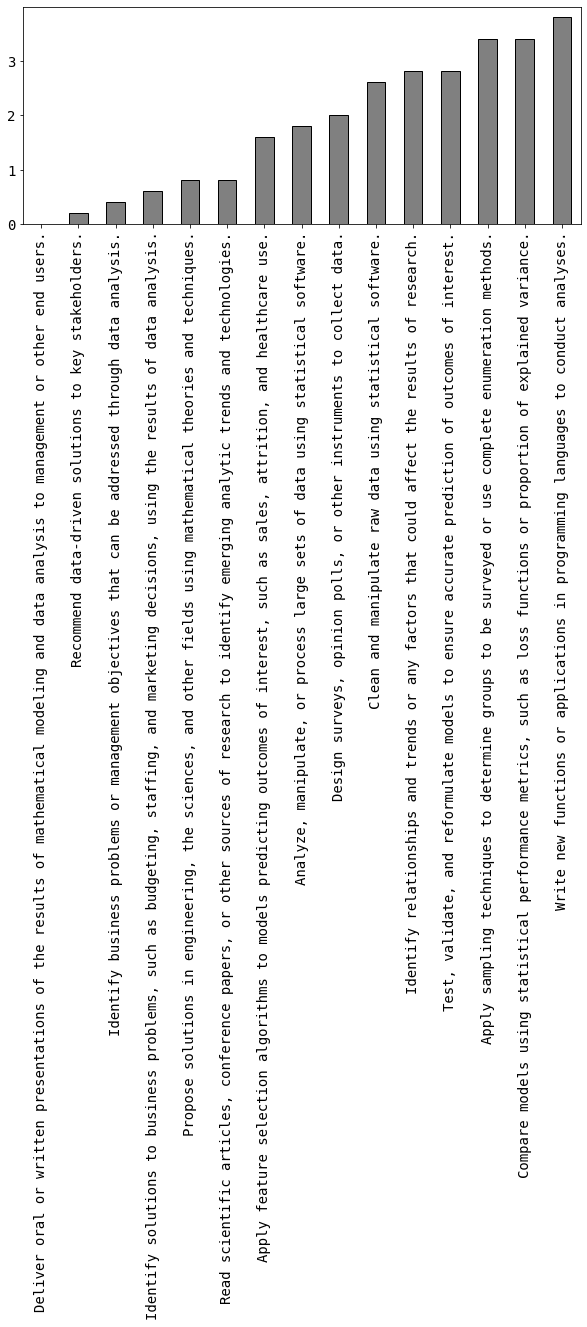

In [95]:
fig, ax = plt.subplots()
df_tasks1.score_analytics.plot(kind='bar', ax=ax, facecolor='0.5', edgecolor='k')
ytk = ax.set_xticklabels(df_tasks1['Tasks'])

In [96]:
# let's convert to Asciidoc: this function was created with ChatGPT!
# Define a function to convert a DataFrame to an Asciidoc table
def df_to_asciidoc(df):
    # Get the column names and the data values from the DataFrame
    columns = df.columns.tolist()
    data = df.values.tolist()

    # Initialize an empty string to store the Asciidoc table syntax
    asciidoc_table = ""

    # Add the [cols="..."] line to specify the relative widths of the columns
    # You can adjust the widths according to your preference
    asciidoc_table += "[cols=\""
    for col in columns:
        asciidoc_table += "1,"
    asciidoc_table = asciidoc_table[:-1] + "\"]\n"

    # Add the |=== line to start the table
    asciidoc_table += "|===\n"

    # Add the header row with | and . symbols
    for col in columns:
        asciidoc_table += "|" + "." + col + "\n"

    # Add the data rows with | symbols
    for row in data:
        for value in row:
            asciidoc_table += "|" + str(value) + "\n"

    # Add the |=== line to end the table
    asciidoc_table += "|===\n"

    # Return the Asciidoc table syntax as a string
    return asciidoc_table


In [97]:
df_tasks1[['Tasks','score_analytics_cat']]

,Tasks,score_analytics_cat
5,Deliver oral or written presentations of the r...,Low
12,Recommend data-driven solutions to key stakeho...,Low
7,Identify business problems or management objec...,Low
9,"Identify solutions to business problems, such ...",Low
10,"Propose solutions in engineering, the sciences...",Low
11,"Read scientific articles, conference papers, o...",Low
1,Apply feature selection algorithms to models p...,Medium
0,"Analyze, manipulate, or process large sets of ...",Medium
6,"Design surveys, opinion polls, or other instru...",Medium
3,Clean and manipulate raw data using statistica...,High


In [98]:
print(df_to_asciidoc(df_tasks1[['Tasks','score_analytics_cat']]))

[cols="1,1"]
|===
|.Tasks
|.score_analytics_cat
|Deliver oral or written presentations of the results of mathematical modeling and data analysis to management or other end users.
|Low
|Recommend data-driven solutions to key stakeholders.
|Low
|Identify business problems or management objectives that can be addressed through data analysis.
|Low
|Identify solutions to business problems, such as budgeting, staffing, and marketing decisions, using the results of data analysis.
|Low
|Propose solutions in engineering, the sciences, and other fields using mathematical theories and techniques.
|Low
|Read scientific articles, conference papers, or other sources of research to identify emerging analytic trends and technologies.
|Low
|Apply feature selection algorithms to models predicting outcomes of interest, such as sales, attrition, and healthcare use.
|Medium
|Analyze, manipulate, or process large sets of data using statistical software.
|Medium
|Design surveys, opinion polls, or other instr

## This book and LLMs

In [99]:
# Usign ChatGPT to create the DF!
# Create a list of lists that contains the data for each row of the DataFrame
data = [
    [1, 'So What', 'How to measure the impact of your team', 'Medium', 'Low', 'Low', 'Medium'],
    [2, 'Metrics Design', 'Find better metrics to action', 'High', 'Low', 'Low', 'Low'],
    [3, 'Growth Decompositions', "Understand what's happening with the business", 'High', 'Low', 'Low', 'Low'],
    [4, '2x2 Designs', 'Simplify to understand', 'High', 'Low', 'Low', 'Low'],
    [5, 'Business Cases', 'How to measure the impact of specific projects', 'High', 'Low', 'Low', 'Low'],
    [6, 'Lift', "Technique to see differences across groups", 'Medium', 'Low', 'Low', 'Low'],
    [7, 'Narratives', "How to build narratives before and after creating a project", 'High', 'Low', 'Low', 'High'],
    [8, 'Datavis', "How to as present results visually", 'High', 'Low', 'Medium', 'Low'],
    [9, 'Simulation & Boot', "Tools to deepen your understanding of ML algorithms", 'Low', 'High', 'Medium', 'Low'],
    [10, 'Linear Regression', "Strengthen your intuition of how ML algorithms work", 'Low', 'Medium', 'Medium', 'Low'],
    [11, 'Data Leakage', "Identify and correct data leakage", 'Low', 'High', 'Medium', 'Low'],
    [12, "Productionizing Models", "Minimal framework to deploy in production", "Low", "Medium", "High", "Low"],
    [13, "Storytelling ML", "Storytelling to create features and to interpret results", "Medium", "High", "Medium", "Low"],
    [14, "Predictions to Decisions", "Making decisions from ML", "Medium", "High", "Medium", "Low"],
    [15, "Incrementality", "Understand the basics of causality", "High", "High", "Medium", "Low"],
    [16, "A/B Tests", "Design of experiments", "High", "High", "Medium", "Low"]
]

# Create a list of strings that contains the column names of the DataFrame
columns = ['Num','Chapter','Main Lesson','Business','ML & Stats','Programming','Soft']

# Use the pd.DataFrame() function to create a DataFrame object from the list of lists and the list of strings
df = pd.DataFrame(data=data, columns=columns)

df.head()

,Num,Chapter,Main Lesson,Business,ML & Stats,Programming,Soft
0,1,So What,How to measure the impact of your team,Medium,Low,Low,Medium
1,2,Metrics Design,Find better metrics to action,High,Low,Low,Low
2,3,Growth Decompositions,Understand what's happening with the business,High,Low,Low,Low
3,4,2x2 Designs,Simplify to understand,High,Low,Low,Low
4,5,Business Cases,How to measure the impact of specific projects,High,Low,Low,Low


In [100]:
df_book = df.copy()
cols = ['Business', 'ML & Stats', 'Programming', 'Soft']
for c, col in enumerate(cols):
    df_book[col].replace(dict_change, inplace=True)
df_book.rename(columns={'ML & Stats':'Machine Learning + Statistics'}, inplace=True)
cols = ['Business', 'Machine Learning + Statistics', 'Programming', 'Soft']
df_book.head()


,Num,Chapter,Main Lesson,Business,Machine Learning + Statistics,Programming,Soft
0,1,So What,How to measure the impact of your team,1,0,0,1
1,2,Metrics Design,Find better metrics to action,3,0,0,0
2,3,Growth Decompositions,Understand what's happening with the business,3,0,0,0
3,4,2x2 Designs,Simplify to understand,3,0,0,0
4,5,Business Cases,How to measure the impact of specific projects,3,0,0,0


In [101]:
df_book['exposure'] = df_book[cols].apply(func_analytics, axis=1)
df_book.sort_values(by='exposure', inplace=True)
df_book2 = num_to_cat(df=df_book, col='exposure', thres1 = thres1, thres2 =thres2)
df_book2.rename(columns={'exposure_cat':'Exposure'}, inplace=True)
df_book2

,Num,Chapter,Main Lesson,Business,Machine Learning + Statistics,Programming,Soft,exposure,Exposure
0,1,So What,How to measure the impact of your team,1,0,0,1,0.0,Low
6,7,Narratives,How to build narratives before and after creat...,3,0,0,3,0.0,Low
5,6,Lift,Technique to see differences across groups,1,0,0,0,0.2,Low
1,2,Metrics Design,Find better metrics to action,3,0,0,0,0.6,Low
2,3,Growth Decompositions,Understand what's happening with the business,3,0,0,0,0.6,Low
3,4,2x2 Designs,Simplify to understand,3,0,0,0,0.6,Low
4,5,Business Cases,How to measure the impact of specific projects,3,0,0,0,0.6,Low
7,8,Datavis,How to as present results visually,3,0,1,0,1.0,Medium
14,15,Incrementality,Understand the basics of causality,3,3,1,0,1.6,Medium
15,16,A/B Tests,Design of experiments,3,3,1,0,1.6,Medium


In [102]:
df_book2['num_chapter'] = df_book2['Num'].astype('str') + '. ' + df_book2['Chapter']
df_book2.head()

,Num,Chapter,Main Lesson,Business,Machine Learning + Statistics,Programming,Soft,exposure,Exposure,num_chapter
0,1,So What,How to measure the impact of your team,1,0,0,1,0.0,Low,1. So What
6,7,Narratives,How to build narratives before and after creat...,3,0,0,3,0.0,Low,7. Narratives
5,6,Lift,Technique to see differences across groups,1,0,0,0,0.2,Low,6. Lift
1,2,Metrics Design,Find better metrics to action,3,0,0,0,0.6,Low,2. Metrics Design
2,3,Growth Decompositions,Understand what's happening with the business,3,0,0,0,0.6,Low,3. Growth Decompositions


In [103]:
df_book_preasc = df_book2[['num_chapter','Main Lesson','Exposure']]
print(df_to_asciidoc(df_book_preasc))

[cols="1,1,1"]
|===
|.num_chapter
|.Main Lesson
|.Exposure
|1. So What
|How to measure the impact of your team
|Low
|7. Narratives
|How to build narratives before and after creating a project
|Low
|6. Lift
|Technique to see differences across groups
|Low
|2. Metrics Design
|Find better metrics to action
|Low
|3. Growth Decompositions
|Understand what's happening with the business
|Low
|4. 2x2 Designs
|Simplify to understand
|Low
|5. Business Cases
|How to measure the impact of specific projects
|Low
|8. Datavis
|How to as present results visually
|Medium
|15. Incrementality
|Understand the basics of causality
|Medium
|16. A/B Tests
|Design of experiments
|Medium
|10. Linear Regression
|Strengthen your intuition of how ML algorithms work
|Medium
|13. Storytelling ML
|Storytelling to create features and to interpret results
|High
|14. Predictions to Decisions
|Making decisions from ML
|High
|9. Simulation & Boot
|Tools to deepen your understanding of ML algorithms
|High
|11. Data Leakage

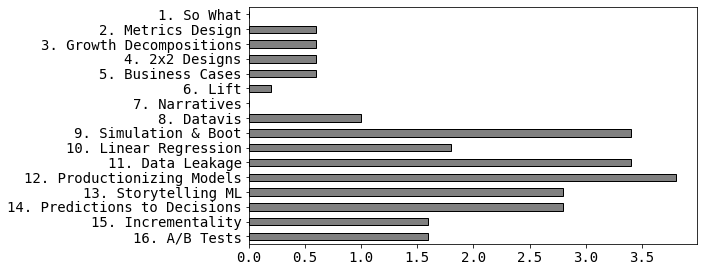

In [104]:
# now create a plot
fig, ax = plt.subplots()
df_plt = df_book2.sort_values(by='Num', ascending=False)[['exposure','num_chapter']]
df_plt.exposure.plot(ax=ax, kind='barh', edgecolor='k', facecolor='0.5')
ytk = ax.set_yticklabels(df_plt.num_chapter)